# GPSIR defined with classes

In [1]:
import matplotlib.pyplot as plt
import random

## Definition of Some Random Variables

In [2]:
def Bernoulli(p):
    """Simulates a random variable with Bernoulli distribution
    with parameter p.
        
    Parameters
    ----------
    p : float
        The parameter of the Bernoulli distribution.

    Returns
    -------
    int
        0 or 1 depending of the result of the experiment
        
    """
    
    u = random.random()
    if u < p:
        return 1
    else:
        return 0

def Geometrica(p):
    """Simulates a random variable with Gemoetric distribution
    with parameter p.
        
    Parameters
    ----------
    p : float
        The parameter of the Geometric distribution.

    Returns
    -------
    L : int
        The number L of Bernoulli trials needed to get one success.
        
    """
    L = 0
    aux = 0
    while aux == 0:
        if Bernoulli(p) == 1:
            aux = 1
        L += 1
    return L

## Definition of the Class Persona

In [3]:
class Persona(object):
    """
    A class used to represent an individual participating in the dynamics of the epidemy 

    ...

    Attributes
    ----------
    contactos: dict
        An empty dictionary in which the individual's contacts are recorded 
        with the contact time as the key and a list of the individuals with 
        whom there was contact as the value.
    
    tao : int
        The number of days that te individual will be infected
        (default 0).
    
    indice : int
        The index with which the person is identified.
    
    estatus : dict
        A dictionary in which the individual's status at each time is recorded 
        with the time as the key and the population to which it belongs.
    
    edad : int
        The age of the individual.
    
    comorbilidades : list
        A list with the comorbidities of the individual 
        (default an empty list []).

    Methods
    -------
    establece_tao():
        Sets the number of days that the infection will last depending
        on the comorbidities of the individual.
    
    agrega_estatus(t, s):
        Adds the status, s, of the individual at time, t, to the dictionary
        estatus.
        
    agrega_contacto(t, person):
        It adds a contact with a person at the time t to the dictionary of 
        contacts.
        
    muestra_contactos():
        Prints the contacts of the individual at each time showing the time of
        the contact and a tuple containing the index of the person with whom 
        there was contact and the population to which it belongs.
    """
    
    def __init__(self, indice, estatus, edad, comorbilidades = []):
        """
        Parameters
        ----------
        indice : int
            The index with which the person is identified.
        
        estatus : dict
            A dictionary in which the individual's status at each time is recorded 
            with the time as the key and the population to which it belongs.
    
        edad : int
            The age of the individual.
    
        comorbilidades : list
            A list with the comorbidities of the individual 
            (default an empty list []).
        """
        
        self.contactos = {}
        self.tao = 0
        self.indice = indice
        self.estatus = estatus
        self.edad = edad
        self.comorbilidades = comorbilidades
        
    def establece_tao(self):
        """Sets the number of days that the infection will last depending
        on the comorbidities of the individual."""
        
        gamma = 1/7
        self.tao = Geometrica(gamma)

    def agrega_estatus(self, t, s):
        """Adds the status, s, of the individual at time, t, to the dictionary
        estatus.
        
        Parameters
        ----------
        t : int
            The time for which the status will be seted.
        s : str
            The population to which it the individual belongs at time t
            (S = susceptible, I = infected, R = removed).
        """
        
        self.estatus[t] = s

    def agrega_contacto(self, t, persona):
        """It adds a contact with a person at the time t to the dictionary of 
        contacts.
        
        This method receives as parameters the time in which the contact was made 
        and the person with whom it was made. If there has not been a contact in 
        that time, it creates a new time key and assigns it a list with the person 
        with whom there was contact. In case there was already a contact at that time, 
        the person is added to the contacts list.
        
        Parameters
        ----------
        t : int
            The time in which the contact happened.
        persona : Persona
            The individual with whom there was contact.
        """

        if t in self.contactos:
            self.contactos[t].append(persona)
        else:
            self.contactos[t] = [persona]

    def muestra_contactos(self):
        """Prints the contacts of the individual at each time showing the time of
        the contact and a tuple containing the index of the person with whom 
        there was contact and the population to which it belongs."""
        
        print("\nContactos para la persona {}:".format(self.indice))
        for t in self.contactos:
            s = str(t)+ " :"
            for c in self.contactos[t]:
                s += " ({},{})".format(c.indice,c.estatus[t])
            print(s)

    def __eq__(self, other):
        """
        We overwrite the method __eq__ in orther to give sense to the boolean
        operator == in the class Persona. In orther to overwirte this method
        we recibe as parameters the object itself and other object to compare.
        The new coparison criterion is the index.
        """
        return (self.indice == other.indice)

## Simulation Of The Dynamics The Epidemy

In [4]:
def Simulacion_Contagios(S0,I0,R0,T,alpha,beta):
    """Simulates the dynamics of the epidemy
        
    Parameters
    ----------
    S0 : int
        Initial population of susceptible individuals.
    
    I0 : int
        Initial population of infected individuals.
    
    R0 : int
        Initial population of recovered individuals.
    
    T : int
        Number of days of the simulation.
    
    alpha: float
        Probability of formation of an edge.
    
    beta: float
        Probability of contagion given infectious contagion.

    Returns
    -------
    Poblacion : list
        List with the individuals and their modified attributes after
        T days of contacts, infections and recoveries. 
        
    """

    Poblacion = []

    # The susceptible are added to the population
    for i in range(1,S0+1):
        p = Persona(i,{0:'S'},21)
        p.establece_tao()
        Poblacion.append(p)
    
    # The infected are added to the population
    for i in range(S0+1,S0+I0+1):
        p = Persona(i,{0:'I'},21)
        p.establece_tao()
        Poblacion.append(p)

    # We iterate over the days of the epidemy
    for t in range(1,T+1):

        # Iteration per day over each individual of the population
        for p1 in Poblacion:

            # Iteration per individual over the rest of the population in orther
            # to generate contats between individuals.
            for p2 in Poblacion:
                if p1.estatus[t-1] == 'S' and p1 != p2 and Bernoulli(alpha):
                    p1.agrega_contacto(t-1,p2)

            # Here starts the modification of the populations S, I, and R.

            # Modifications over the Suceptible population
            if p1.estatus[t-1] == 'S':
                
                # Case in which there were contacts
                if (t-1) in p1.contactos:
                    temp = 0
                    
                    # for each contact we check if there was efective infection
                    for contacto in p1.contactos[t-1]:
                        if contacto.estatus[t-1] == 'I' and Bernoulli(beta):
                            temp +=1
                    
                    # Case in which there was at least one contagious contact
                    if temp >= 1:
                        p1.agrega_estatus(t,'I')
                    
                    # Case in which there were no contagious contacts
                    else:
                        p1.agrega_estatus(t,'S')
                
                # Case in which there were no contacts
                else:
                    p1.agrega_estatus(t,'S')

            # Modifications over the Infected population
            elif p1.estatus[t-1] == 'I':
                
                if p1.tao > 0:
                    p1.agrega_estatus(t,'I')
                    p1.tao -= 1
                
                else:
                    p1.agrega_estatus(t,'R')

            # Modifications over the Removed population
            else:
                p1.agrega_estatus(t,'R')
    
    return Poblacion

## Results

In [5]:
T = 365
Poblacion = Simulacion_Contagios(95,5,0,T,alpha = 0.1,beta = 0.02)

### Final Number of Susceptible, Infected, and Removed Individuals

In [6]:
Sf = 0; If = 0; Rf = 0;
for persona in Poblacion:
    if persona.estatus[T] == 'S':
        Sf += 1
    elif persona.estatus[T] == 'I':
        If += 1
    else:
        Rf += 1
print("Susceptibles: {}\nInfectados: {}\nRecuperados: {}".format(Sf,If,Rf))

Susceptibles: 28
Infectados: 0
Recuperados: 72


### Dynamics for Each Individual

In [7]:
for persona in Poblacion:
    print("\nDinámica para la persona {}:".format(persona.indice))
    print(persona.estatus)


Dinámica para la persona 1:
{0: 'S', 1: 'S', 2: 'S', 3: 'S', 4: 'S', 5: 'S', 6: 'S', 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'S', 12: 'S', 13: 'S', 14: 'S', 15: 'S', 16: 'S', 17: 'S', 18: 'S', 19: 'S', 20: 'S', 21: 'S', 22: 'S', 23: 'S', 24: 'I', 25: 'I', 26: 'I', 27: 'I', 28: 'I', 29: 'R', 30: 'R', 31: 'R', 32: 'R', 33: 'R', 34: 'R', 35: 'R', 36: 'R', 37: 'R', 38: 'R', 39: 'R', 40: 'R', 41: 'R', 42: 'R', 43: 'R', 44: 'R', 45: 'R', 46: 'R', 47: 'R', 48: 'R', 49: 'R', 50: 'R', 51: 'R', 52: 'R', 53: 'R', 54: 'R', 55: 'R', 56: 'R', 57: 'R', 58: 'R', 59: 'R', 60: 'R', 61: 'R', 62: 'R', 63: 'R', 64: 'R', 65: 'R', 66: 'R', 67: 'R', 68: 'R', 69: 'R', 70: 'R', 71: 'R', 72: 'R', 73: 'R', 74: 'R', 75: 'R', 76: 'R', 77: 'R', 78: 'R', 79: 'R', 80: 'R', 81: 'R', 82: 'R', 83: 'R', 84: 'R', 85: 'R', 86: 'R', 87: 'R', 88: 'R', 89: 'R', 90: 'R', 91: 'R', 92: 'R', 93: 'R', 94: 'R', 95: 'R', 96: 'R', 97: 'R', 98: 'R', 99: 'R', 100: 'R', 101: 'R', 102: 'R', 103: 'R', 104: 'R', 105: 'R', 106: 'R', 107: 'R', 

### Contacts for One Individual

In [8]:
Poblacion[0].muestra_contactos()


Contactos para la persona 1:
0 : (2,S) (29,S) (43,S) (68,S) (69,S) (76,S) (82,S)
1 : (10,S) (18,S) (49,S) (84,S) (90,S) (95,S)
2 : (23,S) (26,S) (56,S) (62,S) (85,S) (90,S)
3 : (37,S) (45,S)
4 : (15,S) (22,S) (25,S) (52,S) (55,S) (56,S) (57,S) (60,S) (65,S) (72,S) (76,S) (77,S) (90,S) (91,S)
5 : (6,S) (51,S) (52,S) (66,S) (77,S) (83,S)
6 : (14,S) (15,S) (33,S) (42,S) (70,S) (81,S) (97,I)
7 : (5,S) (19,S) (33,S) (44,R) (46,S) (57,S) (60,S) (61,S) (65,S) (88,S) (93,S)
8 : (3,S) (8,S) (9,S) (12,S) (15,S) (16,I) (23,S) (26,S) (31,S) (50,S) (56,S) (57,S) (67,S) (82,S) (83,S)
9 : (8,S) (20,S) (39,S) (46,S) (53,S) (58,S) (90,S) (96,R)
10 : (16,R) (17,I) (46,S) (55,S) (62,S) (63,S) (70,S) (91,S)
11 : (5,S) (6,S) (7,S) (27,S) (29,S) (31,S) (39,S) (43,S) (48,S) (51,S) (59,S) (88,S)
12 : (9,S) (15,S) (26,S) (28,S) (48,S) (62,S) (64,S) (72,S) (74,S)
13 : (11,S) (20,S) (28,S) (30,S) (31,S) (33,S) (44,R) (51,S) (91,S) (95,S) (96,R)
14 : (4,S) (9,S) (14,S) (25,S) (37,S) (38,S) (45,S) (46,S) (70,S) (

### Plot of The Simulation

In [9]:
def Grafica_Dinamicas(simulacion, T):
    """Plots the evolution of the populations of susceptible,
    infected and removed individuals over time for a simulation.
        
    Parameters
    ----------
    simulacion : list
        List of Persona objects obtained from the function Simulacion_Contagios. 

    T : int
        Number of days in the simulation
    """
        
    S = []; I = []; R = [];
    for t in range(T+1):
        St = 0; It = 0; Rt = 0;
        for persona in simulacion:
            if persona.estatus[t] == 'S':
                St += 1
            elif persona.estatus[t] == 'I':
                It += 1
            else:
                Rt += 1
        S.append(St)
        I.append(It)
        R.append(Rt)

    plt.plot(range(T+1), S, 'm', label = 'S')
    plt.plot(range(T+1), I, 'b', label = 'I')
    plt.plot(range(T+1), R, 'g', label = 'R')
    plt.legend()
    plt.xlabel('Time (days)')
    plt.ylabel('Population Size')
    plt.title('')
    plt.show()

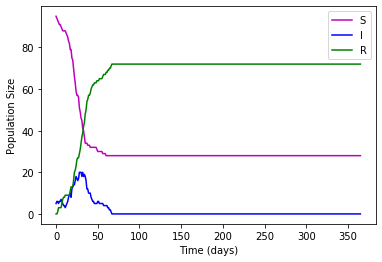

In [10]:
Grafica_Dinamicas(Poblacion, T)